# absorbing state example

First load modules and set print options:

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import transgraph as tg

A more-or-less arbitrary 4 $\times 4$ Markov transition matrix with one absorbing state:

In [32]:
M = np.array(((0.3,0.2,0,0),(0.5,0.3,0,0),(0.1,0,1,0),(0.1,0.5,0,1)))
print(M)


[[ 0.3  0.2  0.   0. ]
 [ 0.5  0.3  0.   0. ]
 [ 0.1  0.   1.   0. ]
 [ 0.1  0.5  0.   1. ]]


Check that the columns all sum to 1:

In [33]:
M.sum(axis=0)

array([ 1.,  1.,  1.,  1.])

Draw the state graph, labeling the edges with the flow:

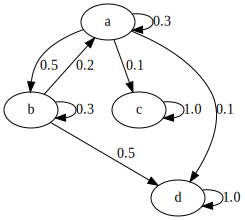

In [34]:
tg.transmat_to_graph(M,["a","b","c","d"],edge_labs="flows")

Extract the $\mathbf A$ matrix: `:-b` means "take the first (zeroth) element up to the bth-to-last one". 

In [35]:
b = 2 ## number of absorbing states
A = M[:-b,:-b]
print(A)

[[ 0.3  0.2]
 [ 0.5  0.3]]


In [ ]:
Extract the $\mathbf B$ matrix: now we want to *start* at the bth-from-last row:

In [37]:
B = M[-b:,:-b]
print(B)

[[ 0.1  0. ]
 [ 0.1  0.5]]


Now compute $\mathbf F = (\mathbf 1 - \mathbf A)^{-1}$:

In [38]:
F = np.linalg.inv(np.eye(2)-A)
print(F)

[[ 1.795  0.513]
 [ 1.282  1.795]]


Column sums represent the total expected number of steps to absorption:

In [39]:
np.sum(F,axis=0)

array([ 3.077,  2.308])

$\mathbf B \mathbf F$ is the probability of ending up in each absorbing state: $c$ (first row) or $d$ (second row), based on starting in state $a$ (first column) or $b$ (second column).

In [40]:
B.dot(F)

array([[ 0.179,  0.051],
       [ 0.821,  0.949]])